In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('sleep and psychological effects.csv')

display(df.head())

In [ ]:
book_genres = df['Favorite_Book_Genre'].unique()
display(book_genres)

genre_mood_counts = {genre: df[df['Favorite_Book_Genre'] == genre]['Mood_Impact'].value_counts() for genre in book_genres}

for genre, counts in genre_mood_counts.items():
    print(f'{genre} mood_count:\n{counts}')
    print('-----------------------------------------------------------------------------------------------------------------')

In [ ]:
female_readers = df[df['Gender'] == 'f'].reset_index(drop=True)
display(female_readers)
sum_female_readers = female_readers.shape[0]
sum_female_readers_hours = female_readers['Weekly_Reading_Time(hours)'].sum()
female_book_genre_count  = female_readers['Favorite_Book_Genre'].value_counts()
print(f'Total de leitoras: {sum_female_readers}')
print(f'Total de horas gastas pelas leitoras: {sum_female_readers_hours}')
print('-----------------------------------------------------------------')
print(f'Contagem de cada genero de livro: {female_book_genre_count}')
print('-----------------------------------------------------------------')

In [ ]:
male_readers = df[df['Gender'] == 'm'].reset_index(drop=True)
display(male_readers)
sum_male_readers = male_readers.shape[0]
sum_male_readers_hours = male_readers['Weekly_Reading_Time(hours)'].sum()
male_book_genre_count = male_readers['Favorite_Book_Genre'].value_counts()
print(f'Total de leitores: {sum_male_readers}')
print(f'Total de horas gastas pelos leitores: {sum_male_readers_hours}')
print('-----------------------------------------------------------------')
print(f'Contagem de cada genero de livro: {male_book_genre_count}')
print('-----------------------------------------------------------------')

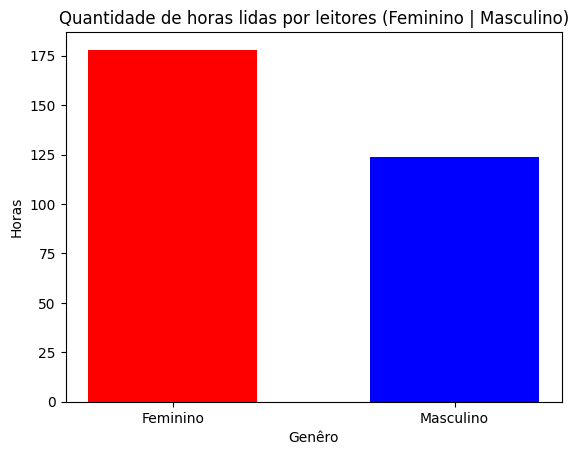

In [109]:
#Gráfico de horas lidas por homens e mulheres

genders = ['Feminino', 'Masculino']
readers = [sum_female_readers_hours, sum_male_readers_hours]

x_positions = np.arange(len(genders))

plt.bar(x_positions, readers, width=0.6, color=['red', 'blue'])

plt.xticks(x_positions, genders)

plt.ylabel('Horas')
plt.xlabel('Genêro')
plt.title('Quantidade de horas lidas por leitores (Feminino | Masculino)')

plt.show()

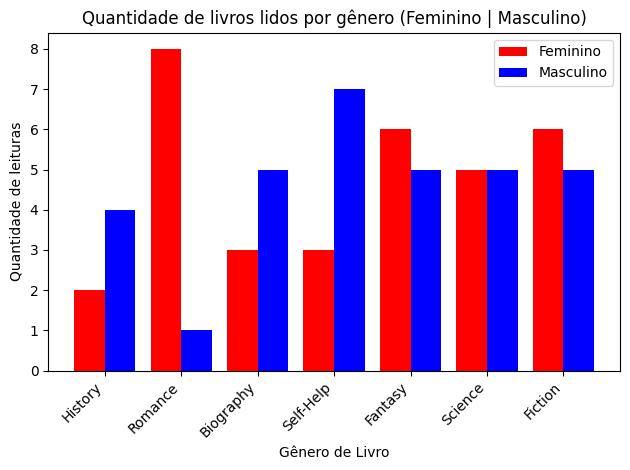

In [105]:
#Gráfico de generos de livros lidos por homens e mulheres

all_genres = set(male_book_genre_count.index).union(female_book_genre_count.index)

male_book_genre_count = male_book_genre_count.reindex(all_genres, fill_value=0)
female_book_genre_count = female_book_genre_count.reindex(all_genres, fill_value=0)


x_positions = np.arange(len(all_genres))
width = 0.4 

plt.bar(x_positions - width / 2, female_book_genre_count, width=width, label='Feminino', color='red')
plt.bar(x_positions + width / 2, male_book_genre_count, width=width, label='Masculino', color='blue')

plt.xticks(x_positions, all_genres, rotation=45, ha='right')

plt.ylabel('Quantidade de leituras')
plt.xlabel('Gênero de Livro')
plt.title('Quantidade de livros lidos por gênero (Feminino | Masculino)')
plt.legend()

plt.tight_layout()
plt.show()

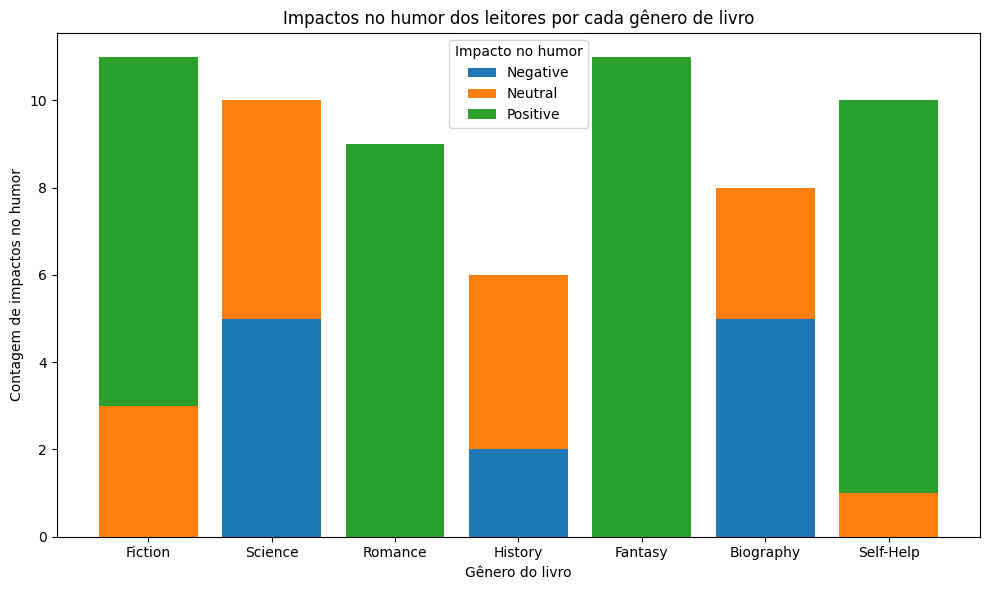

In [108]:
#Gráfico de categorização de impcato de cada gênero de leitura

impact_df = pd.DataFrame(genre_mood_counts).fillna(0).astype(int).T

fig, ax = plt.subplots(figsize=(10, 6))

impacts = impact_df.columns

x = np.arange(len(book_genres))

bottom_values = np.zeros(len(book_genres))

for impact in impacts:
    ax.bar(x, impact_df[impact], label=impact, bottom=bottom_values)
    bottom_values += impact_df[impact]

ax.set_xlabel('Gênero do livro')
ax.set_ylabel('Contagem de impactos no humor')
ax.set_title('Impactos no humor dos leitores por cada gênero de livro')
ax.set_xticks(x)
ax.set_xticklabels(book_genres)
ax.legend(title='Impacto no humor')

plt.tight_layout()
plt.show()